In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score,  classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
# from imblearn.over_sampling import SMOTE
import warnings 
warnings.filterwarnings("ignore")



# Case study..
Equity bank was hit by 2.1 million USD debit card fraud.

Here the "card not present" scam was used to steal from the victims. This uses stolen card details to shop online, the fraudsters often create websites for accessing the funds in those cards.

These transactions are done in batches since most of the banks requires customers to disclose their information.

Kenyan Banks lose about USD 130 million to cyber criminals yearly mostly through;
loan stacking ... practice of getting approval for multiple loans or credits simultaneously within a very short period
Identity theft 

# Here are the Objectives..
1. Classify whether a transactions is fraudulent or non-fraudulent using patterns from historical data

2. Identify unusual transactions patterns that may signal fraudulent activities, checking for outliers within the transactions.

3. Train machine learning model which predicts fraudulent transactions based on historical data.

4. Study how demographics including age and gender impact fraud risks.

5. Identify peak fraud periods based on transactions date and transactions time.

# References 
https://techcabal.com/2024/04/24/equity-bank-employee-involved-in-fraud/

In [3]:
df = pd.read_csv("data/Bank_Transaction_Fraud_Detection.csv")
df.head()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,...,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,...,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,...,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,...,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com


In [4]:
# checking for missing value
df.isna().sum()

Customer_ID                0
Customer_Name              0
Gender                     0
Age                        0
State                      0
City                       0
Bank_Branch                0
Account_Type               0
Transaction_ID             0
Transaction_Date           0
Transaction_Time           0
Transaction_Amount         0
Merchant_ID                0
Transaction_Type           0
Merchant_Category          0
Account_Balance            0
Transaction_Device         0
Transaction_Location       0
Device_Type                0
Is_Fraud                   0
Transaction_Currency       0
Customer_Contact           0
Transaction_Description    0
Customer_Email             0
dtype: int64

In [5]:
# check the shape of the dataset
print("Shape of the dataset:", df.shape)


Shape of the dataset: (200000, 24)


In [6]:
# Here check for the column name and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer_ID              200000 non-null  object 
 1   Customer_Name            200000 non-null  object 
 2   Gender                   200000 non-null  object 
 3   Age                      200000 non-null  int64  
 4   State                    200000 non-null  object 
 5   City                     200000 non-null  object 
 6   Bank_Branch              200000 non-null  object 
 7   Account_Type             200000 non-null  object 
 8   Transaction_ID           200000 non-null  object 
 9   Transaction_Date         200000 non-null  object 
 10  Transaction_Time         200000 non-null  object 
 11  Transaction_Amount       200000 non-null  float64
 12  Merchant_ID              200000 non-null  object 
 13  Transaction_Type         200000 non-null  object 
 14  Merc

In [7]:
# check for the summary statistics for the numerical columns
print(df.describe())

                 Age  Transaction_Amount  Account_Balance       Is_Fraud
count  200000.000000       200000.000000    200000.000000  200000.000000
mean       44.015110        49538.015554     52437.988784       0.050440
std        15.288774        28551.874004     27399.507128       0.218852
min        18.000000           10.290000      5000.820000       0.000000
25%        31.000000        24851.345000     28742.395000       0.000000
50%        44.000000        49502.440000     52372.555000       0.000000
75%        57.000000        74314.625000     76147.670000       0.000000
max        70.000000        98999.980000     99999.950000       1.000000


In [8]:
# get the summary statistics for categorical columns
df.describe(include = object)

,Customer_ID,Customer_Name,Gender,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,Transaction_Time,Merchant_ID,Transaction_Type,Merchant_Category,Transaction_Device,Transaction_Location,Device_Type,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
count,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000
unique,200000,142699,2,34,145,145,3,200000,31,77856,200000,5,6,20,148,4,1,9000,172,4779
top,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Aahana Kala,Male,Nagaland,Chandigarh,Chandigarh Branch,Checking,4fa3208f-9e23-42dc-b330-844829d0c12c,29-01-2025,07:30:31,214e03c5-5c34-40d1-a66c-f440aa2bbd02,Credit,Restaurant,Self-service Banking Machine,"Kavaratti, Lakshadweep",POS,INR,+9191471XXXXXX,Sports ticket,krishnaXXX@XXXXX.com
freq,1,8,100452,6031,8135,8135,66924,1,6854,11,1,40180,33525,21707,5954,50111,200000,41,1268,99


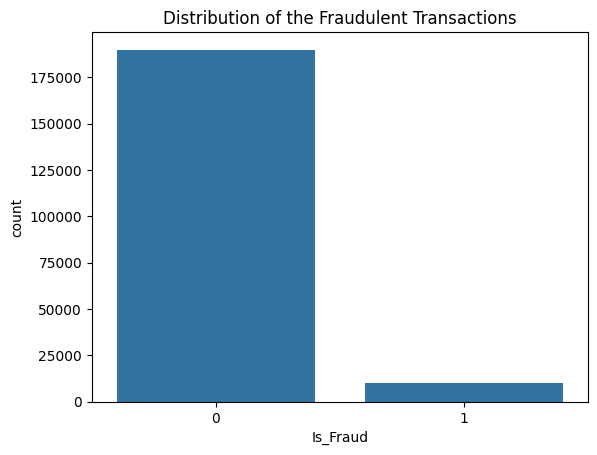

In [9]:
# Analyzing the target variable by checking distribution 
df["Is_Fraud"].value_counts(normalize = True)

# visualizing the distribution
sns.countplot(x = "Is_Fraud", data = df)
plt.title("Distribution of the Fraudulent Transactions")
plt.show()

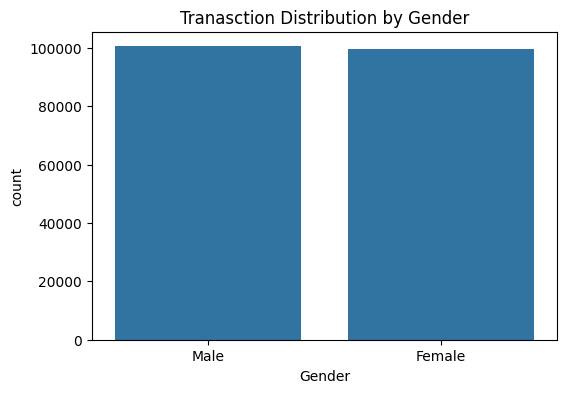

In [10]:
# get the transactions by gender..
plt.figure(figsize = (6,4))
sns.countplot(x = df["Gender"])
plt.title("Tranasction Distribution by Gender")
plt.show()

# check for the fraud rate by gender


# # Check fraud rate per gender
# plt.figure(figsize=(6,4))
# sns.barplot(x=data['gender'], y=data['fraud_label'])
# plt.title("Fraud Rate by Gender")
# plt.show()


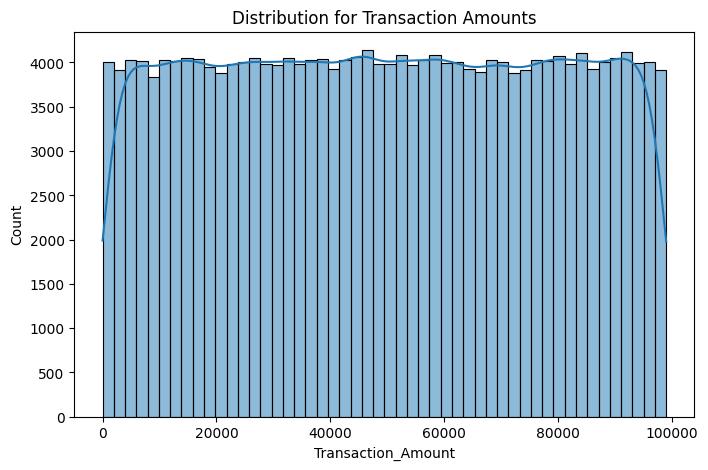

In [11]:
# Distribution of the transaction amounts
plt.figure(figsize = (8, 5))
sns.histplot(df["Transaction_Amount"], bins = 50, kde = True)
plt.title("Distribution for Transaction Amounts")
plt.show()

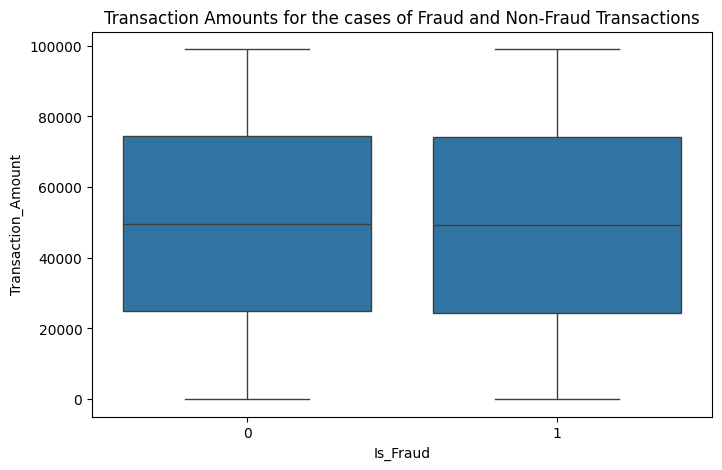

In [12]:
# here we visualize a Boxplot of the transaction amounts for fraud against non-fraud
plt.figure(figsize = (8, 5))
sns.boxplot(x = df["Is_Fraud"], y = df["Transaction_Amount"])
plt.title("Transaction Amounts for the cases of Fraud and Non-Fraud Transactions")
plt.show()

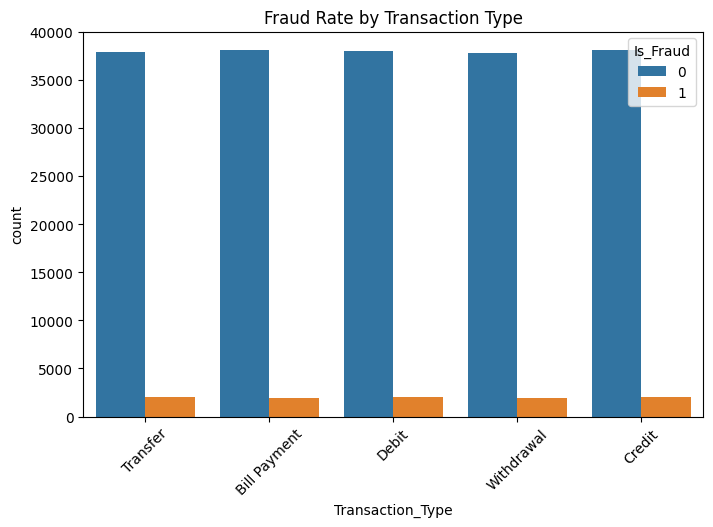

In [13]:
# Analyze the transaction type based on Fraud cases.
plt.figure(figsize = (8, 5))
sns.countplot(x = df["Transaction_Type"], hue = df["Is_Fraud"])
plt.xticks(rotation = 45)
plt.title("Fraud Rate by Transaction Type")
plt.show()

In [14]:
df.columns

Index(['Customer_ID', 'Customer_Name', 'Gender', 'Age', 'State', 'City',
       'Bank_Branch', 'Account_Type', 'Transaction_ID', 'Transaction_Date',
       'Transaction_Time', 'Transaction_Amount', 'Merchant_ID',
       'Transaction_Type', 'Merchant_Category', 'Account_Balance',
       'Transaction_Device', 'Transaction_Location', 'Device_Type', 'Is_Fraud',
       'Transaction_Currency', 'Customer_Contact', 'Transaction_Description',
       'Customer_Email'],
      dtype='object')

In [15]:
# # Analyze the transaction patterns over time
# df["Transaction_Time"] = pd.to_datetime(df["Transaction_Time"])
# print(df["Transaction_Time"])

# print("-----")

# # create a new column to identify whether the transaction is Fraudulent
# df1 = df[df["Is_Fraud"] == 1]
# df1

# group the data by the time intervals then count the number of fraudulent transactions
# fraudulent_activities = data[data["Is_Fraud"]].resample('D', on = "Transaction_Time").size()



In [16]:
df.head(3)

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,...,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,...,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com


In [17]:
df.columns

Index(['Customer_ID', 'Customer_Name', 'Gender', 'Age', 'State', 'City',
       'Bank_Branch', 'Account_Type', 'Transaction_ID', 'Transaction_Date',
       'Transaction_Time', 'Transaction_Amount', 'Merchant_ID',
       'Transaction_Type', 'Merchant_Category', 'Account_Balance',
       'Transaction_Device', 'Transaction_Location', 'Device_Type', 'Is_Fraud',
       'Transaction_Currency', 'Customer_Contact', 'Transaction_Description',
       'Customer_Email'],
      dtype='object')

# Data Preparation

In [18]:
selected_columns = df.drop(columns = ['Customer_ID', 'Customer_Name', 'State', 'City', 'Bank_Branch', 'Transaction_ID', 'Merchant_ID', 
                                 'Transaction_Location', 'Transaction_Currency', 'Customer_Contact', 'Customer_Email'])

# create a copy of the data frame for the selected columns
df1 = selected_columns.copy()
df1.head()

,Gender,Age,Account_Type,Transaction_Date,Transaction_Time,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Device_Type,Is_Fraud,Transaction_Description
0,Male,60,Savings,23-01-2025,16:04:07,32415.45,Transfer,Restaurant,74557.27,Voice Assistant,POS,0,Bitcoin transaction
1,Female,51,Business,11-01-2025,17:14:53,43622.60,Bill Payment,Restaurant,74622.66,POS Mobile Device,Desktop,0,Grocery delivery
2,Male,20,Savings,25-01-2025,03:09:52,63062.56,Bill Payment,Groceries,66817.99,ATM,Desktop,0,Mutual fund investment
3,Female,57,Business,19-01-2025,12:27:02,14000.72,Debit,Entertainment,58177.08,POS Mobile App,Mobile,0,Food delivery
4,Female,43,Savings,30-01-2025,18:30:46,18335.16,Transfer,Entertainment,16108.56,Virtual Card,Mobile,0,Debt repayment


Gender
Female    5007
Male      5081
dtype: int64


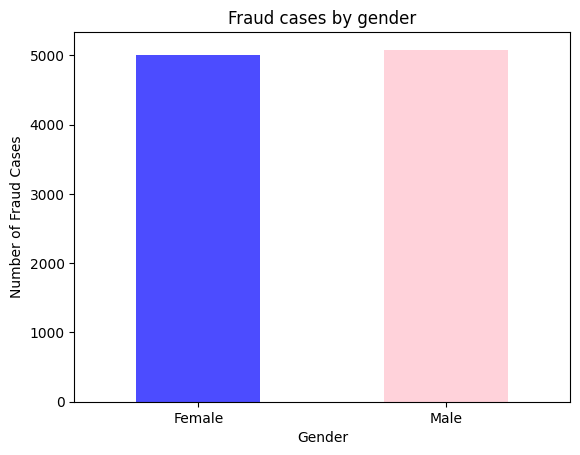

In [19]:
# Visualize which gender has been affected by fraud cases
# here lets group by gender to and count the number of fraud cases
fraud_gender = df1[df1['Is_Fraud'] == 1].groupby("Gender").size()
print(fraud_gender)

# plot the count of fraud cases by gender
fraud_gender.plot(kind = 'bar', color = ['blue', 'pink'], alpha = .7)
plt.title('Fraud cases by gender')
plt.xlabel('Gender')
plt.ylabel('Number of Fraud Cases')
plt.xticks(rotation = 0)
plt.show()


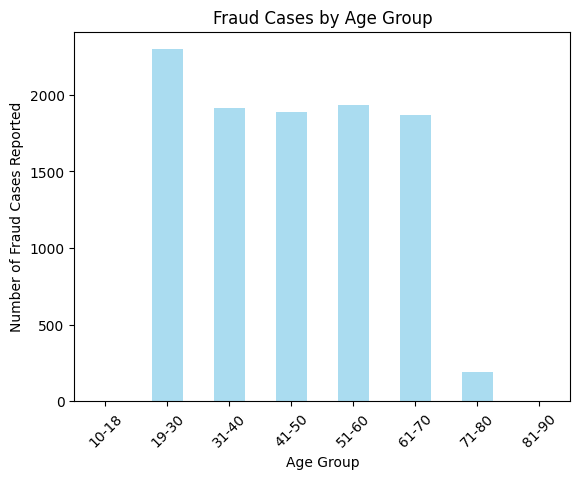

In [20]:
# Classify the age into bins for the ages affected by fraud.
bins = [10, 18, 30, 40, 50, 60, 70, 80, 90]
labels = ['10-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
df1['age_group'] = pd.cut(df1['Age'], bins = bins, labels = labels, right = False)

# filter the DataFrame for fraud cases and group 
age_bins_fraud = df1[df1["Is_Fraud"] == True]['age_group'].value_counts().sort_index()

# plot the ages for each bin showing the fraud cases
age_bins_fraud.plot(kind = 'bar', color = 'skyblue', alpha = .7)
plt.title('Fraud Cases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Fraud Cases Reported')
plt.xticks(rotation=45)
plt.show()

In [21]:
df1.columns

Index(['Gender', 'Age', 'Account_Type', 'Transaction_Date', 'Transaction_Time',
       'Transaction_Amount', 'Transaction_Type', 'Merchant_Category',
       'Account_Balance', 'Transaction_Device', 'Device_Type', 'Is_Fraud',
       'Transaction_Description', 'age_group'],
      dtype='object')

In [22]:
df1["Account_Type"].value_counts()

Account_Type
Checking    66924
Savings     66593
Business    66483
Name: count, dtype: int64

In [23]:
df1.head()

,Gender,Age,Account_Type,Transaction_Date,Transaction_Time,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Device_Type,Is_Fraud,Transaction_Description,age_group
0,Male,60,Savings,23-01-2025,16:04:07,32415.45,Transfer,Restaurant,74557.27,Voice Assistant,POS,0,Bitcoin transaction,61-70
1,Female,51,Business,11-01-2025,17:14:53,43622.60,Bill Payment,Restaurant,74622.66,POS Mobile Device,Desktop,0,Grocery delivery,51-60
2,Male,20,Savings,25-01-2025,03:09:52,63062.56,Bill Payment,Groceries,66817.99,ATM,Desktop,0,Mutual fund investment,19-30
3,Female,57,Business,19-01-2025,12:27:02,14000.72,Debit,Entertainment,58177.08,POS Mobile App,Mobile,0,Food delivery,51-60
4,Female,43,Savings,30-01-2025,18:30:46,18335.16,Transfer,Entertainment,16108.56,Virtual Card,Mobile,0,Debt repayment,41-50


In [24]:
# Analyze the transaction device affected by fraud..
device_distribution = df1['Transaction_Device'].value_counts()
print("\n Transaction Distribution by Device:")
print(device_distribution)


 Transaction Distribution by Device:
Transaction_Device
Self-service Banking Machine    21707
ATM                             21200
ATM Booth Kiosk                 21149
Debit/Credit Card                8273
Smart Card                       8133
Wearable Device                  8128
Virtual Card                     8059
Tablet                           8059
Desktop/Laptop                   8057
Voice Assistant                  8039
POS Mobile Device                8006
Banking Chatbot                  7995
Web Browser                      7981
Biometric Scanner                7952
QR Code Scanner                  7938
Mobile Device                    7879
Payment Gateway Device           7874
POS Mobile App                   7868
Bank Branch                      7855
POS Terminal                     7848
Name: count, dtype: int64


Account_Type  Is_Fraud  Transaction_Amount
Business      0         49676.893774          1
              1         49145.601315          1
Checking      0         49638.506099          1
              1         49797.408423          1
Savings       0         49339.967154          1
              1         48901.338818          1
Name: count, dtype: int64


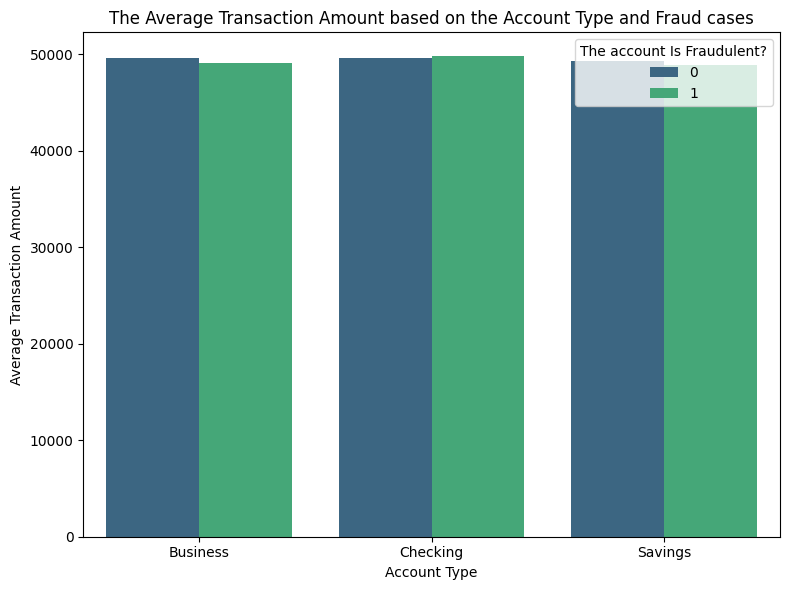

In [26]:
# classify the transactions amounts and the account type as Fraudulent 
grouped_data = df1.groupby(['Account_Type', 'Is_Fraud'])['Transaction_Amount'].mean().reset_index()
print(grouped_data.value_counts())

# visualize the grouped data
plt.figure(figsize = (8, 6))
sns.barplot(x = 'Account_Type', y = 'Transaction_Amount', hue = 'Is_Fraud', data = grouped_data, palette = 'viridis')
plt.title("The Average Transaction Amount based on the Account Type and Fraud cases")
plt.xlabel('Account Type')
plt.ylabel('Average Transaction Amount')
plt.legend(title = 'The account Is Fraudulent?')
plt.tight_layout()
plt.show()

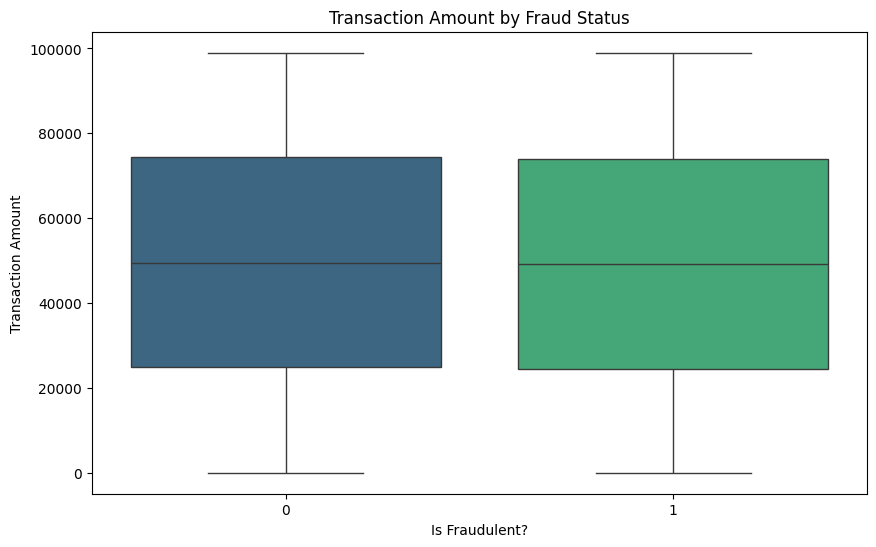

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot of transaction amounts by fraud status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Is_Fraud', y='Transaction_Amount', data=df1, palette='viridis')
plt.title("Transaction Amount by Fraud Status")
plt.xlabel("Is Fraudulent?")
plt.ylabel("Transaction Amount")
plt.show()

In [39]:
# Get the most common Transaction method used by customers 
most_common_payment_method = df1['Transaction_Type'].mode()[0]
print("Most Common Payment Method:", most_common_payment_method)

Most Common Payment Method: Credit



Peak Fraud Period:
Start: 2025-01-08 18:00:00
End: 2025-01-08 19:00:00


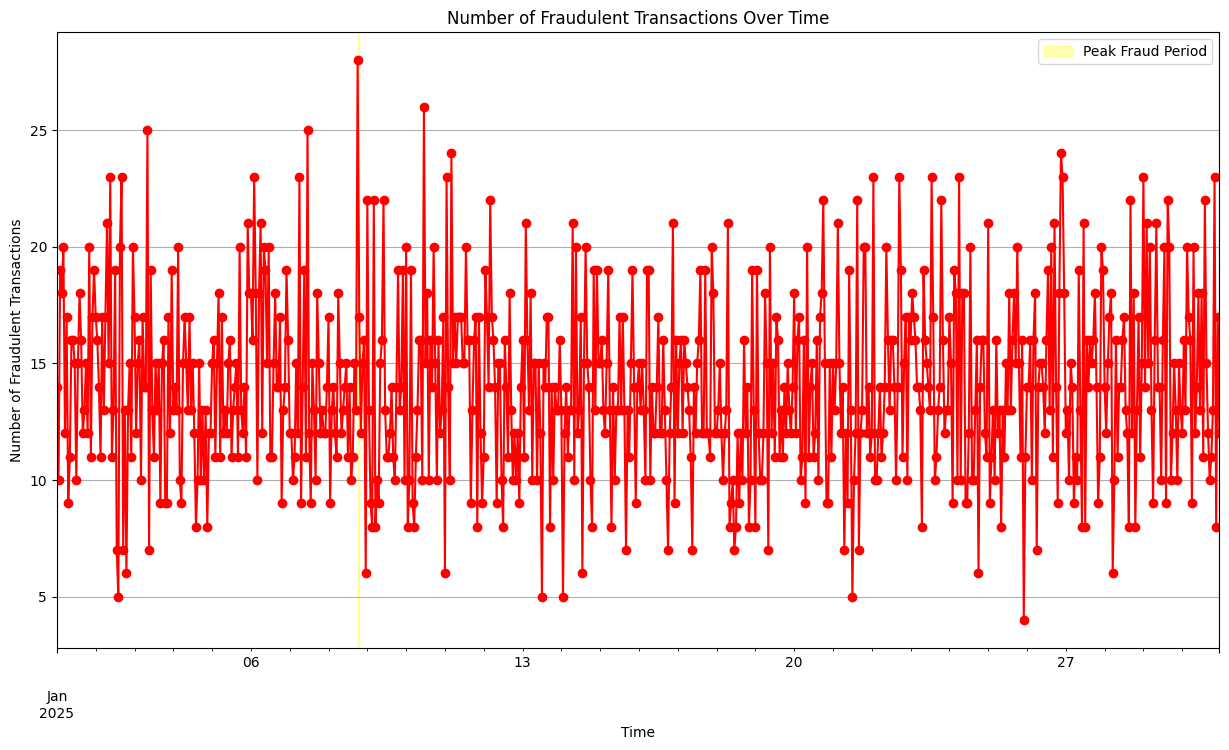

In [45]:
# Step 1: Combine Transaction_Date and Transaction_Time into a single datetime column
df1['transaction_datetime'] = pd.to_datetime(df1['Transaction_Date'] + ' ' + df1['Transaction_Time'])

# Step 2: Filter the dataset to include only fraudulent transactions
fraud_df = df1[df1['Is_Fraud'] == 1]

# Step 3: Resample the data to count the number of frauds per hour
fraud_df.set_index('transaction_datetime', inplace=True)
fraud_counts = fraud_df.resample('H').size()

# Step 4: Identify the peak fraud period
peak_period_start = fraud_counts.idxmax()
peak_period_end = peak_period_start + pd.Timedelta(hours=1)

print("\nPeak Fraud Period:")
print(f"Start: {peak_period_start}")
print(f"End: {peak_period_end}")

# Step 5: Visualize the fraud counts over time
plt.figure(figsize=(15, 8))
fraud_counts.plot(kind='line', marker='o', color='red')
plt.axvspan(peak_period_start, peak_period_end, color='yellow', alpha=0.3, label='Peak Fraud Period')
plt.title("Number of Fraudulent Transactions Over Time")
plt.xlabel("Time")
plt.ylabel("Number of Fraudulent Transactions")
plt.legend()
plt.grid()
plt.show()

In [ ]:
df1

In [52]:
df1['Transaction_Amount'].value_counts()

Transaction_Amount
78931.12    3
48165.03    3
3591.91     3
56984.73    3
60214.31    3
           ..
97561.90    1
16607.76    1
42482.95    1
37063.23    1
58622.49    1
Name: count, Length: 197978, dtype: int64

In [50]:
df1['Transaction_Amount'].max()

98999.98

In [51]:
df1['Transaction_Amount'].min()

10.29

In [ ]:
df1["transaction_amount"][95]


Unusual Transactions:
Empty DataFrame
Columns: [Gender, Age, Account_Type, Transaction_Date, Transaction_Time, Transaction_Amount, Transaction_Type, Merchant_Category, Account_Balance, Transaction_Device, Device_Type, Is_Fraud, Transaction_Description, age_group, Z_Score, Is_Unusual]
Index: []


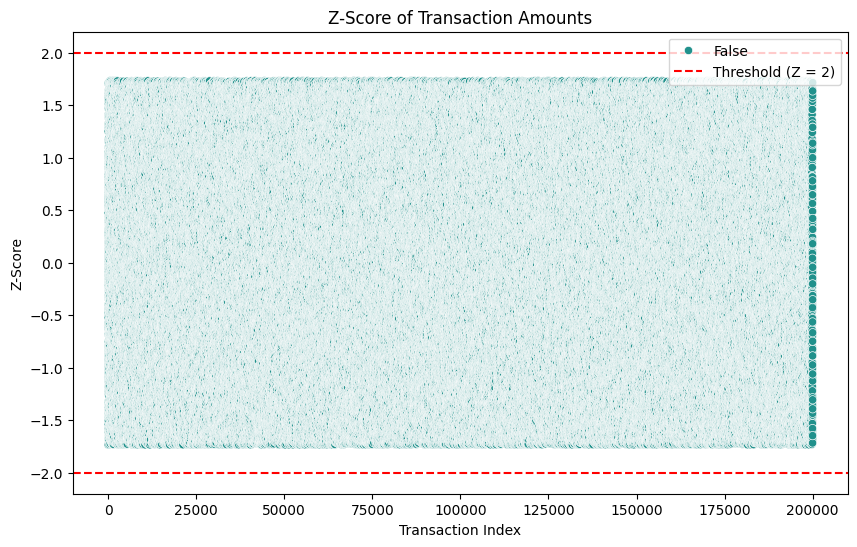

In [28]:
# Use the Z score to identify transactions amount which are fraudulent
# Calculate the Z-score for Transaction_Amount
mean_amount = df1['Transaction_Amount'].mean()
std_amount = df1['Transaction_Amount'].std()
df1['Z_Score'] = (df1['Transaction_Amount'] - mean_amount) / std_amount

# Flag transactions with Z-scores outside the threshold (e.g., |Z-score| > 3)
threshold = 2
df1['Is_Unusual'] = np.abs(df1['Z_Score']) > threshold

# Display transactions flagged as unusual
print("\nUnusual Transactions:")
print(df1[df1['Is_Unusual']])

# Visualize the Z-scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df1.index, y='Z_Score', hue='Is_Unusual', data=df1, palette='viridis')
plt.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold (Z = {threshold})')
plt.axhline(y=-threshold, color='red', linestyle='--')
plt.title("Z-Score of Transaction Amounts")
plt.xlabel("Transaction Index")
plt.ylabel("Z-Score")
plt.legend()
plt.show()

In [29]:
# The z score measures how many standard deviations the transaction amount is from the mean.


Ensemble Methods
Balanced Random Forest: Modifies the random forest algorithm to handle class imbalance by undersampling the majority class at each tree.
AdaBoost: Adjusts the weights of incorrectly classified instances, which can help in focusing on the minority class.

In [33]:
# def identify_peak_fraud_period(df1):
    

In [ ]:
import pandas as pd

def identify_peak_fraud_period(df1):
    """
    Identifies the peak fraud period based on the transaction date and transaction time in df1.
    
    Args:
    df1 (pd.DataFrame): DataFrame containing columns 'transaction_date', 'transaction_time', and 'is_fraud'.
                        'transaction_date' should be in 'YYYY-MM-DD' format.
                        'transaction_time' should be in 'HH:MM:SS' format.
                        'is_fraud' should be a boolean indicating whether the transaction is fraudulent.
                        
    Returns:
    peak_period (tuple): The start and end of the peak fraud period as strings in the format 'YYYY-MM-DD HH:MM:SS'.
    """
    
    # Combine the transaction_date and transaction_time into a single datetime column
    df1['transaction_datetime'] = pd.to_datetime(df1['Transaction_Date'] + ' ' + df1['Transaction_Time'])
    
    # Filter the fraudulent transactions
    fraud_df = df1[df1['Is_Fraud']]
    
    # Set the transaction_datetime as the index
    fraud_df.set_index('transaction_datetime', inplace=True)
    
    # Resample the data to find the number of frauds per hour
    fraud_counts = fraud_df.resample('H').size()
    
    # Identify the period with the maximum number of frauds
    peak_period_start = fraud_counts.idxmax()
    peak_period_end = peak_period_start + pd.Timedelta(hours=1)
    
    return peak_period_start.strftime('%Y-%m-%d %H:%M:%S'), peak_period_end.strftime('%Y-%m-%d %H:%M:%S')



In [ ]:
df

In [54]:
# Define the function
def identify_peak_fraud_period(df1):
    # Combine the transaction_date and transaction_time into a single datetime column
    df1['transaction_datetime'] = pd.to_datetime(df1['Transaction_Date'] + ' ' + df1['Transaction_Time'])
    
    # Filter the fraudulent transactions
    fraud_df = df1[df1['Is_Fraud']]
    
    # Set the transaction_datetime as the index
    fraud_df.set_index('transaction_datetime', inplace=True)
    
    # Resample the data to find the number of frauds per hour
    fraud_counts = fraud_df.resample('H').size()
    
    # Identify the period with the maximum number of frauds
    peak_period_start = fraud_counts.idxmax()
    peak_period_end = peak_period_start + pd.Timedelta(hours=1)
    
    return peak_period_start.strftime('%Y-%m-%d %H:%M:%S'), peak_period_end.strftime('%Y-%m-%d %H:%M:%S')

# Call the function and get the peak fraud period
peak_period = identify_peak_fraud_period(df1)
print("\nPeak Fraud Period:")
print(f"Start: {peak_period[0]}")
print(f"End: {peak_period[1]}")

KeyError: "None of [Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,\n       ...\n       0, 0, 0, 0, 0, 0, 0, 0, 0, 0],\n      dtype='int64', length=200000)] are in the [columns]"